<a href="https://colab.research.google.com/github/rodolfoplondero/Algoritmos-de-Ordenacao/blob/main/Ordena%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entradas

Cada método deverá ordenar os dados em diversos tamanhos de entrada. Considere os dados com os seguintes tamanhos: $10, 10^2, 10^3, 10^4, 10^5, 10^6$. Os valores devem ser gerados aleatoriamente e uma única vez em todos os experimentos.

# Saída

A saída consiste na análise comparativa do tempo de ordenação entre os métodos. Deverá ser avaliada a ordenação com dados em três situaçãos: a) aleatórios; b) já ordenados (crescente); c) inversamente ordenados. Deverá ser gerado um gráfico de linha para cada conjunto de dados.
Detalhes sobre a saída dos dados serão comentadas em sala de aula

# Implementação

## Importando as bibliotecas

In [1]:
import numpy as np
import time
import random
from matplotlib import pyplot as plt
from pprint import pprint

## Definição dos Algoritmos de Ordenação

### Bubble Sort

In [2]:
#----------------------------------------------------------------------
# Bubble Sort (Bolha)
#----------------------------------------------------------------------
def bubbleSort(array):    
    tamanho_array = len(array)

    for posFinal in range(tamanho_array - 1, 0, -1):
        trocou = False
        
        for pos in range(posFinal):
            if array[pos] > array[pos+1]:
                array[pos], array[pos+1] = array[pos+1], array[pos]
                trocou = True
                
        if not trocou:
            break

    return array

### Selection Sort

In [3]:
#----------------------------------------------------------------------
# Selection Sort (Seleção)
#----------------------------------------------------------------------
def selectionSort(array):

    tamanho_array = len(array)

    for index in range(0, tamanho_array):
        min_index = index
        
        for j in range(index + 1, tamanho_array):
            if array[j] < array[min_index]:
                min_index = j
        
        array[index], array[min_index] = array[min_index], array[index]

    return array

### Insertion Sort

In [4]:
#----------------------------------------------------------------------
# Insertion Sort (Inserção)
#----------------------------------------------------------------------
def insertionSort(array):

    tamanho_array = len(array)

    for i in range(0, tamanho_array):
        
        elemento_atual = array[i]

        while (i > 0) and (array[i - 1] > elemento_atual):
            array[i] = array[i - 1]
            i -= 1

        array[i] = elemento_atual

    return array

### Merge Sort

In [5]:
#----------------------------------------------------------------------
# Merge Sort
#----------------------------------------------------------------------
def mergeSort(array):    
    
    tamanho_array = len(array)

    if tamanho_array > 1:
        
        meio = tamanho_array // 2
        esquerda = array[:meio]
        direita = array[meio:]

        mergeSort(esquerda)
        mergeSort(direita)

        i = 0
        j = 0
        k = 0

        tamanho_esquerda = len(esquerda)
        tamanho_direita  = len(direita)

        while (i < tamanho_esquerda) and (j < tamanho_direita):
            if esquerda[i] < direita[j]:
                array[k] = esquerda[i]
                i += 1
            else:
                array[k] = direita[j]
                j += 1
            k += 1

        for i in range(i, tamanho_esquerda):
            array[k] = esquerda[i]
            k += 1
        
        for j in range(j, tamanho_direita):
            array[k] = direita[j]
            k += 1
    
    return array

### Quick Sort

In [6]:
#----------------------------------------------------------------------
# Quick Sort (Bolha)
#----------------------------------------------------------------------
def quickSort(array):
    
    if len(array) < 1:
        return array
    else:
        pIndex = len(array) // 2  # Pivot defino como o elemento médio do array
        pivot = array.pop(pIndex)

    maiores = []
    menores = []

    for item in array:
        if item > pivot:
            maiores.append(item)
        else:
            menores.append(item)

    return quickSort(menores) + [pivot] + quickSort(maiores)

## Aplicação dos algoritmos

In [19]:
# Função usada para aplicar cada algoritmo e imprimir logs
def aplicacao_algoritmos(algoritmo, key, val):
    print(f"Array {key}...", end=" ")

    # Início do timer
    ti = time.time()
    
    # Aplicação do algoritmo
    res = algoritmo(val.copy()) 
    
    # Fim do timer
    t = time.time() - ti 

    # Ajuste para conversão do tempo
    # Se t > 1s não converte, se não multiplica por 1000 passando para milissegundos
    if t > 1:
        print(f"{t:.4f} s", end=" ")
    else:
        print(f"{t*1000:.4f} ms", end=" ")
    
    # Imprime as primeiras 15 posições do array ordenado
    # Para imprimir mais posições basta alterar o valor ou retirar a linha 26, corrigindo a identação da linha 27
    print("[", end="")
    x = 0
    while x < len(res):
        if x <= 15:
            print(res[x], end=", ")
        x += 1
    print("...]")

    return res, t

## Definição dos casos e inicialização de variáveis

In [8]:
# Casos
casos = {'caso_1': 10,
         'caso_2': 10**2,
         'caso_3': 10**3,
         'caso_4': 10**4,
         'caso_5': 10**5,
         'caso_6': 10**6}

# Algoritmos
algoritmos = ['bolha', 'insercao', 'selecao', 'quick', 'merge']

# Arranjos
arrays     = ['ordenado', 'inverso', 'aleatorio']

# Inicialização dos dicionários para armazenamento dos tempos e dos arrays ordenados
#
# Ex:
#   Caso_1:
#       Bolha:
#           Ordenado:  0
#           Inverso:   0
#           Aleatório: 0
#       Inserção:
#           Ordenado:  0
#           Inverso:   0
#           Aleatório: 0
#  E assim por diante para os demais casos e algoritmos

tempos = dict()
resultados = dict()

for i in range(0, len(casos)):
    caso = f"caso_{i+1}"

    tempos[caso] = {}
    resultados[caso] = {}

    for j in algoritmos:
        tempos[caso][j] = {}
        resultados[caso][j] = {}

        for x in arrays:
            tempos[caso][j][x] = 0
            resultados[caso][j][x] = []

# Descomentar as linhas abaixo para visualizar os dicionários criados
# pprint(tempos)
# pprint(resultados)

# Caso 01

Array inicial - ordenado:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Array inicial - inverso:   [10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
Array inicial - aleatório: [3, 6, 0, 9, 5, 7, 4, 1, 10, 2, 8]
----------------------------------------------------------------------------------------------------

Aplicando o Algoritmo da Bolha...
Array ordenado... 0.0055 ms [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, ...]
Array inverso... 0.0374 ms [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, ...]
Array aleatorio... 0.0238 ms [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, ...]

Aplicando o Algoritmo de Seleção...
Array ordenado... 0.0236 ms [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, ...]
Array inverso... 0.0215 ms [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, ...]
Array aleatorio... 0.0207 ms [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, ...]

Aplicando o Algoritmo de Inserção...
Array ordenado... 0.0103 ms [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, ...]
Array inverso... 0.0274 ms [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, ...]
Array aleatorio... 0.0191 ms [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 

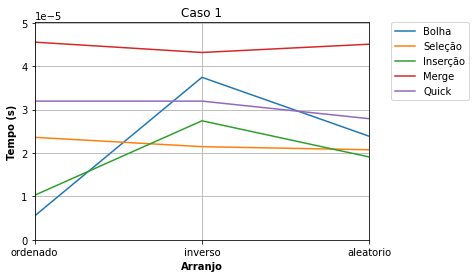

In [22]:
nome_caso = 'caso_1'

# Cria uma lista sequencial com base no dicionário "casos"
# O +1 é usado para incluir o último elemento 
array_inicial = list(range(casos[nome_caso]+1))

# Dicionário com os arrays de acordo com cada arranjo
array = dict()
array['ordenado']  = array_inicial.copy()                 # Array ordenado
array['inverso']   = sorted(array_inicial, reverse=True)  # Array inverso

random.shuffle(array_inicial)
array['aleatorio'] = array_inicial.copy()                 # Array aleatório

print(f"Array inicial - ordenado:  {array['ordenado']}")
print(f"Array inicial - inverso:   {array['inverso']}")
print(f"Array inicial - aleatório: {array['aleatorio']}")
print("-"*100)

maximo = 0

# Aplica os algoritmos para cada arranjo no dicionário "array"
# e salva nos dicionários "tempos" e "resultados"
# key corresponde aos nomes dos arranjos (ordenado, inverso, aleatório)
# val corresponde às listas correspondentes
print("\nAplicando o Algoritmo da Bolha...")
for key, val in array.items():
    res, t = aplicacao_algoritmos(bubbleSort, key, val)
    
    tempos[nome_caso]['bolha'][key] = t
    resultados[nome_caso]['bolha'][key] = res

    maximo = t if t > maximo else maximo

print("\nAplicando o Algoritmo de Seleção...")
for key, val in array.items():
    res, t = aplicacao_algoritmos(selectionSort, key, val)
    
    tempos[nome_caso]['selecao'][key] = t
    resultados[nome_caso]['selecao'][key] = res

    maximo = t if t > maximo else maximo

print("\nAplicando o Algoritmo de Inserção...")
for key, val in array.items():
    res, t = aplicacao_algoritmos(insertionSort, key, val)
    
    tempos[nome_caso]['insercao'][key] = t
    resultados[nome_caso]['insercao'][key] = res

    maximo = t if t > maximo else maximo

print("\nAplicando o Algoritmo Merge...")
for key, val in array.items():
    res, t = aplicacao_algoritmos(mergeSort, key, val)
    
    tempos[nome_caso]['merge'][key] = t
    resultados[nome_caso]['merge'][key] = res

    maximo = t if t > maximo else maximo

print("\nAplicando o Algoritmo Quick...")
for key, val in array.items():
    res, t = aplicacao_algoritmos(quickSort, key, val)
    
    tempos[nome_caso]['quick'][key] = t
    resultados[nome_caso]['quick'][key] = res

    maximo = t if t > maximo else maximo

print("-"*100)
print()

# Plot dos tempos
fig, ax0 = plt.subplots()

ax0.plot(list(tempos[nome_caso]['bolha'].keys()),    list(tempos[nome_caso]['bolha'].values()),    label='Bolha')
ax0.plot(list(tempos[nome_caso]['selecao'].keys()),  list(tempos[nome_caso]['selecao'].values()),  label='Seleção')
ax0.plot(list(tempos[nome_caso]['insercao'].keys()), list(tempos[nome_caso]['insercao'].values()), label='Inserção')
ax0.plot(list(tempos[nome_caso]['merge'].keys()),    list(tempos[nome_caso]['merge'].values()),    label='Merge')
ax0.plot(list(tempos[nome_caso]['quick'].keys()),    list(tempos[nome_caso]['quick'].values()),    label='Quick')

plt.title(nome_caso.title().replace("_", " "))
plt.xlabel("Arranjo",   fontweight='bold')
plt.ylabel("Tempo (s)", fontweight='bold')
plt.xlim(0, 2)
plt.ylim(bottom=0, top=maximo+(maximo/10))
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.82))
plt.grid()
plt.show()

# Caso 02

Array inicial - ordenado:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
Array inicial - inverso:   [100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
Array inicial - aleatório: [51, 26, 45, 23, 59, 55, 25, 19, 7, 28, 57, 43, 85, 2, 83, 52, 12, 21, 97, 8, 30, 98, 5, 82, 39, 73, 69, 62, 44, 46, 32, 6, 94,

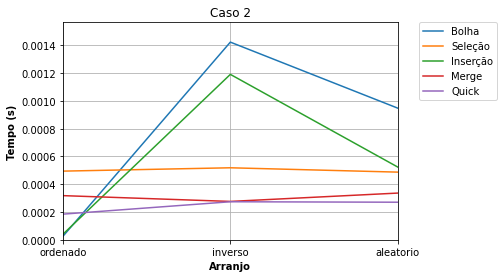

In [23]:
nome_caso = 'caso_2'

# Cria uma lista sequencial com base no dicionário "casos"
# O +1 é usado para incluir o último elemento 
array_inicial = list(range(casos[nome_caso]+1))

# Dicionário com os arrays de acordo com cada arranjo
array = dict()
array['ordenado']  = array_inicial.copy()                 # Array ordenado
array['inverso']   = sorted(array_inicial, reverse=True)  # Array inverso

random.shuffle(array_inicial)
array['aleatorio'] = array_inicial.copy()                 # Array aleatório

print(f"Array inicial - ordenado:  {array['ordenado']}")
print(f"Array inicial - inverso:   {array['inverso']}")
print(f"Array inicial - aleatório: {array['aleatorio']}")
print("-"*100)

# Variável para armazenar o tempo máximo, utilizada para definir o ymax do plot
maximo = 0

# Aplica os algoritmos para cada arranjo no dicionário "array"
# e salva nos dicionários "tempos" e "resultados"
# key corresponde aos nomes dos arranjos (ordenado, inverso, aleatório)
# val corresponde às listas correspondentes
print("\nAplicando o Algoritmo da Bolha...")
for key, val in array.items():
    res, t = aplicacao_algoritmos(bubbleSort, key, val)
    
    tempos[nome_caso]['bolha'][key] = t
    resultados[nome_caso]['bolha'][key] = res

    maximo = t if t > maximo else maximo

print("\nAplicando o Algoritmo de Seleção...")
for key, val in array.items():
    res, t = aplicacao_algoritmos(selectionSort, key, val)
    
    tempos[nome_caso]['selecao'][key] = t
    resultados[nome_caso]['selecao'][key] = res

    maximo = t if t > maximo else maximo

print("\nAplicando o Algoritmo de Inserção...")
for key, val in array.items():
    res, t = aplicacao_algoritmos(insertionSort, key, val)
    
    tempos[nome_caso]['insercao'][key] = t
    resultados[nome_caso]['insercao'][key] = res

    maximo = t if t > maximo else maximo

print("\nAplicando o Algoritmo Merge...")
for key, val in array.items():
    res, t = aplicacao_algoritmos(mergeSort, key, val)
    
    tempos[nome_caso]['merge'][key] = t
    resultados[nome_caso]['merge'][key] = res

    maximo = t if t > maximo else maximo

print("\nAplicando o Algoritmo Quick...")
for key, val in array.items():
    res, t = aplicacao_algoritmos(quickSort, key, val)
    
    tempos[nome_caso]['quick'][key] = t
    resultados[nome_caso]['quick'][key] = res

    maximo = t if t > maximo else maximo

print("-"*100)
print()

# Plot dos tempos
fig, ax0 = plt.subplots()

ax0.plot(list(tempos[nome_caso]['bolha'].keys()),    list(tempos[nome_caso]['bolha'].values()),    label='Bolha')
ax0.plot(list(tempos[nome_caso]['selecao'].keys()),  list(tempos[nome_caso]['selecao'].values()),  label='Seleção')
ax0.plot(list(tempos[nome_caso]['insercao'].keys()), list(tempos[nome_caso]['insercao'].values()), label='Inserção')
ax0.plot(list(tempos[nome_caso]['merge'].keys()),    list(tempos[nome_caso]['merge'].values()),    label='Merge')
ax0.plot(list(tempos[nome_caso]['quick'].keys()),    list(tempos[nome_caso]['quick'].values()),    label='Quick')

plt.title(nome_caso.title().replace("_", " "))
plt.xlabel("Arranjo",   fontweight='bold')
plt.ylabel("Tempo (s)", fontweight='bold')
plt.xlim(0, 2)
plt.ylim(bottom=0, top=maximo+(maximo/10))
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.82))
plt.grid()
plt.show()

# Caso 03

Array inicial - ordenado:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 21

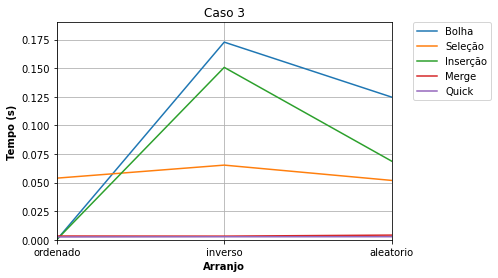

In [25]:
nome_caso = 'caso_3'

# Cria uma lista sequencial com base no dicionário "casos"
# O +1 é usado para incluir o último elemento 
array_inicial = list(range(casos[nome_caso]+1))

# Dicionário com os arrays de acordo com cada arranjo
array = dict()
array['ordenado']  = array_inicial.copy()                 # Array ordenado
array['inverso']   = sorted(array_inicial, reverse=True)  # Array inverso

random.shuffle(array_inicial)
array['aleatorio'] = array_inicial.copy()                 # Array aleatório

print(f"Array inicial - ordenado:  {array['ordenado']}")
print(f"Array inicial - inverso:   {array['inverso']}")
print(f"Array inicial - aleatório: {array['aleatorio']}")
print("-"*100)

# Variável para armazenar o tempo máximo, utilizada para definir o ymax do plot
maximo = 0

# Aplica os algoritmos para cada arranjo no dicionário "array"
# e salva nos dicionários "tempos" e "resultados"
# key corresponde aos nomes dos arranjos (ordenado, inverso, aleatório)
# val corresponde às listas correspondentes
print("\nAplicando o Algoritmo da Bolha...")
for key, val in array.items():
    res, t = aplicacao_algoritmos(bubbleSort, key, val)
    
    tempos[nome_caso]['bolha'][key] = t
    resultados[nome_caso]['bolha'][key] = res

    maximo = t if t > maximo else maximo

print("\nAplicando o Algoritmo de Seleção...")
for key, val in array.items():
    res, t = aplicacao_algoritmos(selectionSort, key, val)
    
    tempos[nome_caso]['selecao'][key] = t
    resultados[nome_caso]['selecao'][key] = res

    maximo = t if t > maximo else maximo

print("\nAplicando o Algoritmo de Inserção...")
for key, val in array.items():
    res, t = aplicacao_algoritmos(insertionSort, key, val)
    
    tempos[nome_caso]['insercao'][key] = t
    resultados[nome_caso]['insercao'][key] = res

    maximo = t if t > maximo else maximo

print("\nAplicando o Algoritmo Merge...")
for key, val in array.items():
    res, t = aplicacao_algoritmos(mergeSort, key, val)
    
    tempos[nome_caso]['merge'][key] = t
    resultados[nome_caso]['merge'][key] = res

    maximo = t if t > maximo else maximo

print("\nAplicando o Algoritmo Quick...")
for key, val in array.items():
    res, t = aplicacao_algoritmos(quickSort, key, val)
    
    tempos[nome_caso]['quick'][key] = t
    resultados[nome_caso]['quick'][key] = res

    maximo = t if t > maximo else maximo

print("-"*100)
print()

# Plot dos tempos
fig, ax0 = plt.subplots()

ax0.plot(list(tempos[nome_caso]['bolha'].keys()),    list(tempos[nome_caso]['bolha'].values()),    label='Bolha')
ax0.plot(list(tempos[nome_caso]['selecao'].keys()),  list(tempos[nome_caso]['selecao'].values()),  label='Seleção')
ax0.plot(list(tempos[nome_caso]['insercao'].keys()), list(tempos[nome_caso]['insercao'].values()), label='Inserção')
ax0.plot(list(tempos[nome_caso]['merge'].keys()),    list(tempos[nome_caso]['merge'].values()),    label='Merge')
ax0.plot(list(tempos[nome_caso]['quick'].keys()),    list(tempos[nome_caso]['quick'].values()),    label='Quick')

plt.title(nome_caso.title().replace("_", " "))
plt.xlabel("Arranjo",   fontweight='bold')
plt.ylabel("Tempo (s)", fontweight='bold')
plt.xlim(0, 2)
plt.ylim(bottom=0, top=maximo+(maximo/10))
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.82))
plt.grid()
plt.show()

# Caso 04

Array inicial - ordenado:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 21

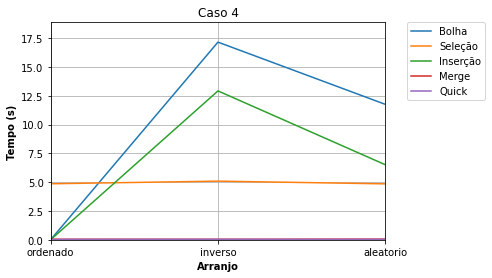

In [26]:
nome_caso = 'caso_4'

# Cria uma lista sequencial com base no dicionário "casos"
# O +1 é usado para incluir o último elemento 
array_inicial = list(range(casos[nome_caso]+1))

# Dicionário com os arrays de acordo com cada arranjo
array = dict()
array['ordenado']  = array_inicial.copy()                 # Array ordenado
array['inverso']   = sorted(array_inicial, reverse=True)  # Array inverso

random.shuffle(array_inicial)
array['aleatorio'] = array_inicial.copy()                 # Array aleatório

print(f"Array inicial - ordenado:  {array['ordenado']}")
print(f"Array inicial - inverso:   {array['inverso']}")
print(f"Array inicial - aleatório: {array['aleatorio']}")
print("-"*100)

# Variável para armazenar o tempo máximo, utilizada para definir o ymax do plot
maximo = 0

# Aplica os algoritmos para cada arranjo no dicionário "array"
# e salva nos dicionários "tempos" e "resultados"
# key corresponde aos nomes dos arranjos (ordenado, inverso, aleatório)
# val corresponde às listas correspondentes
print("\nAplicando o Algoritmo da Bolha...")
for key, val in array.items():
    res, t = aplicacao_algoritmos(bubbleSort, key, val)
    
    tempos[nome_caso]['bolha'][key] = t
    resultados[nome_caso]['bolha'][key] = res

    maximo = t if t > maximo else maximo

print("\nAplicando o Algoritmo de Seleção...")
for key, val in array.items():
    res, t = aplicacao_algoritmos(selectionSort, key, val)
    
    tempos[nome_caso]['selecao'][key] = t
    resultados[nome_caso]['selecao'][key] = res

    maximo = t if t > maximo else maximo

print("\nAplicando o Algoritmo de Inserção...")
for key, val in array.items():
    res, t = aplicacao_algoritmos(insertionSort, key, val)
    
    tempos[nome_caso]['insercao'][key] = t
    resultados[nome_caso]['insercao'][key] = res

    maximo = t if t > maximo else maximo

print("\nAplicando o Algoritmo Merge...")
for key, val in array.items():
    res, t = aplicacao_algoritmos(mergeSort, key, val)
    
    tempos[nome_caso]['merge'][key] = t
    resultados[nome_caso]['merge'][key] = res

    maximo = t if t > maximo else maximo

print("\nAplicando o Algoritmo Quick...")
for key, val in array.items():
    res, t = aplicacao_algoritmos(quickSort, key, val)
    
    tempos[nome_caso]['quick'][key] = t
    resultados[nome_caso]['quick'][key] = res

    maximo = t if t > maximo else maximo

print("-"*100)
print()

# Plot dos tempos
fig, ax0 = plt.subplots()

ax0.plot(list(tempos[nome_caso]['bolha'].keys()),    list(tempos[nome_caso]['bolha'].values()),    label='Bolha')
ax0.plot(list(tempos[nome_caso]['selecao'].keys()),  list(tempos[nome_caso]['selecao'].values()),  label='Seleção')
ax0.plot(list(tempos[nome_caso]['insercao'].keys()), list(tempos[nome_caso]['insercao'].values()), label='Inserção')
ax0.plot(list(tempos[nome_caso]['merge'].keys()),    list(tempos[nome_caso]['merge'].values()),    label='Merge')
ax0.plot(list(tempos[nome_caso]['quick'].keys()),    list(tempos[nome_caso]['quick'].values()),    label='Quick')

plt.title(nome_caso.title().replace("_", " "))
plt.xlabel("Arranjo",   fontweight='bold')
plt.ylabel("Tempo (s)", fontweight='bold')
plt.xlim(0, 2)
plt.ylim(bottom=0, top=maximo+(maximo/10))
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.82))
plt.grid()
plt.show()

# Caso 05

In [ ]:
nome_caso = 'caso_5'

# Cria uma lista sequencial com base no dicionário "casos"
# O +1 é usado para incluir o último elemento 
array_inicial = list(range(casos[nome_caso]+1))

# Dicionário com os arrays de acordo com cada arranjo
array = dict()
array['ordenado']  = array_inicial.copy()                 # Array ordenado
array['inverso']   = sorted(array_inicial, reverse=True)  # Array inverso

random.shuffle(array_inicial)
array['aleatorio'] = array_inicial.copy()                 # Array aleatório

print(f"Array inicial - ordenado:  {array['ordenado']}")
print(f"Array inicial - inverso:   {array['inverso']}")
print(f"Array inicial - aleatório: {array['aleatorio']}")
print("-"*100)

# Variável para armazenar o tempo máximo, utilizada para definir o ymax do plot
maximo = 0

# Aplica os algoritmos para cada arranjo no dicionário "array"
# e salva nos dicionários "tempos" e "resultados"
# key corresponde aos nomes dos arranjos (ordenado, inverso, aleatório)
# val corresponde às listas correspondentes
print("\nAplicando o Algoritmo Merge...")
for key, val in array.items():
    res, t = aplicacao_algoritmos(mergeSort, key, val)
    
    tempos[nome_caso]['merge'][key] = t
    resultados[nome_caso]['merge'][key] = res

    maximo = t if t > maximo else maximo

print("\nAplicando o Algoritmo Quick...")
for key, val in array.items():
    res, t = aplicacao_algoritmos(quickSort, key, val)
    
    tempos[nome_caso]['quick'][key] = t
    resultados[nome_caso]['quick'][key] = res

    maximo = t if t > maximo else maximo

print("\nAplicando o Algoritmo da Bolha...")
for key, val in array.items():
    res, t = aplicacao_algoritmos(bubbleSort, key, val)
    
    tempos[nome_caso]['bolha'][key] = t
    resultados[nome_caso]['bolha'][key] = res

    maximo = t if t > maximo else maximo

print("\nAplicando o Algoritmo de Seleção...")
for key, val in array.items():
    res, t = aplicacao_algoritmos(selectionSort, key, val)
    
    tempos[nome_caso]['selecao'][key] = t
    resultados[nome_caso]['selecao'][key] = res

    maximo = t if t > maximo else maximo

print("\nAplicando o Algoritmo de Inserção...")
for key, val in array.items():
    res, t = aplicacao_algoritmos(insertionSort, key, val)
    
    tempos[nome_caso]['insercao'][key] = t
    resultados[nome_caso]['insercao'][key] = res

    maximo = t if t > maximo else maximo
    
print("-"*100)
print()

# Plot dos tempos
fig, ax0 = plt.subplots()

ax0.plot(list(tempos[nome_caso]['bolha'].keys()),    list(tempos[nome_caso]['bolha'].values()),    label='Bolha')
ax0.plot(list(tempos[nome_caso]['selecao'].keys()),  list(tempos[nome_caso]['selecao'].values()),  label='Seleção')
ax0.plot(list(tempos[nome_caso]['insercao'].keys()), list(tempos[nome_caso]['insercao'].values()), label='Inserção')
ax0.plot(list(tempos[nome_caso]['merge'].keys()),    list(tempos[nome_caso]['merge'].values()),    label='Merge')
ax0.plot(list(tempos[nome_caso]['quick'].keys()),    list(tempos[nome_caso]['quick'].values()),    label='Quick')

plt.title(nome_caso.title().replace("_", " "))
plt.xlabel("Arranjo",   fontweight='bold')
plt.ylabel("Tempo (s)", fontweight='bold')
plt.xlim(0, 2)
plt.ylim(bottom=0, top=maximo+(maximo/10))
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.82))
plt.grid()
plt.show()

Array inicial - ordenado:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 21